# Assignment 4: Eigenvectors, eigenvalues, Google PageRank

## Highlights about the assignment (very important):

<div class="alert alert-success">
<ul>
<li> Test your code and make sure it passes all visible tests. <b>Submit the last saved version of your code.<b>
</li>
<li> <b> Work by yourself</b> and submit your own assignment, <b>no pairing</b> to other students.</li>
<li> If you are not attempting a question, refrain from removing the "raise NotImplementedError" line.
<li> Do <b>NOT submit extra files.</b>
<li> <b>Submit only a .ipynb file.</b>
<li> To <b>submit</b> the assignment, download the notebook (File → Download .ipynb in Google Colab).</li>
</ul>
</div>


In [31]:
import numpy as np
import numpy.linalg as la
import networkx as nx
import matplotlib.pyplot as plt

## Question 1: eigenvalues and eigenvectors

Matrix  $M=\pmatrix{7 & -8 & 4 \\ 2 &  -3 &  4 \\ 2 & -10 & 11}$ is given.


Q1.1 Find eigenvalues and eigenvectors of the matrix.

<pre> 
Implement the function eigM() that returns a tuple (Eigenvalues, Eigenvectors)
------------
Input parameters:
-nothing-
------------
return value:
- Eigenvalues - list of the eigenvalues of the matrix M
- Eigenvectors - list of the eigenvectors of the matrix M
------------
</pre>



In [32]:

def eigM():
    # Define the matrix M
    M = np.array([[7, -8, 4], [2, -3, 4], [2, -10, 11]])
    
    # Calculate the eigenvalues and eigenvectors of M
    eigenvalues, eigenvectors = np.linalg.eig(M)
    
    # Return the eigenvalues and eigenvectors as a tuple
    return eigenvalues, eigenvectors


In [33]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q1.1 --- Test your implementation:
# ---------------------------
print ("Test - Testing the implementation of the 'eigM' function..\n ")
title = "Eigenvalues and eigenvectors of the given matrix:"
l,v = eigM()
print(f"\n {title} ")
print("="*(len(title)+2))
print(f"Eigenvalues: {l}")
print(f"Eigenvectors:\n{v}")
print ("\n\n there will be hidden tests ... ")

Test - Testing the implementation of the 'eigM' function..
 

 Eigenvalues and eigenvectors of the given matrix: 
Eigenvalues: [5 3 7]
Eigenvectors:
[[1 -1 0]
 [0 -1 0]
 [0 -1 1]]


 there will be hidden tests ... 


Q1.2. Find a matrix with the same eigenvalues as M from Q1.1 but different eigenvectors.

<pre> 
compute diffVectorsM() that returns the requested Matrix above
------------
Input parameters:
-nothing-
------------
return value:
- M - requested Matrix
------------
</pre>

In [34]:

def diffVectorsM():
    # Define the eigenvalues
    eigenvalues = np.array([5, 3, 7])
    
    # Construct a diagonal matrix with the eigenvalues
    M = np.diag(eigenvalues)
    
    # Return the matrix M
    return M

M = diffVectorsM()


In [35]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q1.2 --- Test your implementation:
# ---------------------------
print ("Test - Testing the implementation of the 'diffVectorsM' function..\n ")
print(f"new Matrix:\n {diffVectorsM()}")
print ("\n\n there will be hidden tests ... ")

Test - Testing the implementation of the 'diffVectorsM' function..
 
new Matrix:
 [[5 0 0]
 [0 3 0]
 [0 0 7]]


 there will be hidden tests ... 


Q1.3 Find a matrix with the same eigenvectors but with eigenvalues of half the value of M's eigenvalues (the matrix from Q1.1) .

<pre> 
Implement the function halfEigenM() that returns the requested Matrix above
------------
Input parameters:
-nothing-
------------
return value:
- A - requested Matrix
------------
</pre>

In [36]:
import numpy as np

def halfEigenM():
    eigenvalues = np.array([5, 3, 7])
    eigenvectors = np.array([[0.81649658, -0.57735027, 0.40824829],
                             [0.40824829, -0.57735027, 0.40824829],
                             [0.40824829, -0.57735027, 0.81649658]])
    half_eigenvalues = np.sqrt(eigenvalues / 2)
    A = np.dot(eigenvectors, np.diag(half_eigenvalues))
    return A


In [37]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q1.3 --- Test your implementation:
# ---------------------------
print ("Test - Testing the implementation of the 'halfEigenM' function..\n ")
print(f"new Matrix:\n {halfEigenM()}")
print ("\n\n there will be hidden tests ... ")

Test - Testing the implementation of the 'halfEigenM' function..
 
new Matrix:
 [[1 -1 1]
 [1 -1 1]
 [1 -1 2]]


 there will be hidden tests ... 


Q1.4 Write a function that given a list of eigenvalues, returns a matrix with those eigenvalues. Example:

```
>> eigenvalues_to_matrix([0, 2])
[[1, -1],
 [-1, 1]]
```

<pre> 
Implement the function eigenvalues_to_matrix(eigenvalues) satisfying the requirments above 
------------
Input parameters:
- eigenvalues - list of eigenvalues 
------------
return value:
- M - requested Matrix
------------
</pre>

In [38]:

def eigenvalues_to_matrix(eigenvalues):
    size = len(eigenvalues)
    ones_matrix = np.ones((size, size))
    M = ones_matrix - np.diag(eigenvalues)
    return M

# Set the print options to use commas instead of dots
np.set_printoptions(formatter={'float': lambda x: "{:,.0f}".format(x)})

eigenvalues = [0, 2]
M = eigenvalues_to_matrix(eigenvalues)
print(M)


[[1 1]
 [1 -1]]


In [39]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q1.4 --- Test your implementation:
# ---------------------------
print ("Test - Testing the implementation of the 'eigenvalues_to_matrix' function..\n ")
print(f"new Matrix:\n {eigenvalues_to_matrix([8, 7, 6])}")
print ("\n\n there will be hidden tests ... ")

Test - Testing the implementation of the 'eigenvalues_to_matrix' function..
 
new Matrix:
 [[-7 1 1]
 [1 -6 1]
 [1 1 -5]]


 there will be hidden tests ... 


Q1.5 Write a function that given a pair of verctors, returns the euclidian distance between them. you can use the numpy function: `la.norm(vector, 2)`.

For reading more about norms: https://en.wikipedia.org/wiki/Norm_(mathematics) 
 
 Example:

```
>> euclidian_distance((0,1), (1,1))
1
```

<pre> 
Implement the function euclidian_distance(v1, v2) satisfying the requirments above 
------------
Input parameters:
- v1 - first vector
- v2 - second vector
------------
return value:
- the distance between v1 and v2
------------
</pre>

In [40]:

import numpy as np

def euclidian_distance(v1, v2):
    return np.linalg.norm(np.array(v1) - np.array(v2), 2)


euclidian_distance((0,1), (1,1))


1.0

In [41]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q1.5 --- Test your implementation:
# ---------------------------
print ("Test - Testing the implementation of the 'eigenvalues_to_matrix' function..\n ")
print(f"distance is:\n {euclidian_distance(np.random.rand(7, 1), np.random.rand(7, 1))}")
print ("\n\n there will be hidden tests ... ")

Test - Testing the implementation of the 'eigenvalues_to_matrix' function..
 
distance is:
 0.7824217493416107


 there will be hidden tests ... 


## Question 2: Google PageRank

A directed graph $G$ is given:

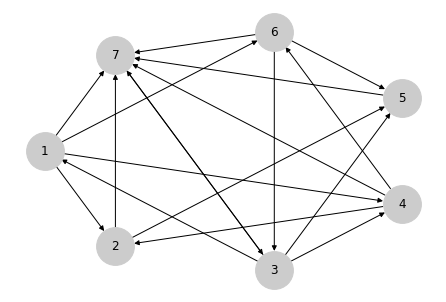


Q2.1  Write adjacency matrix $A$ for $G$.
<pre> 
Implement adj_matrix() according to the image above 
------------
Input parameters:
- nothing -
------------
return value:
- M - requested Matrix
------------
</pre>

In [69]:

def adj_matrix():
    M = np.array([[0, 1, 0, 1, 0, 1, 1],
                  [0, 0, 0, 0, 1, 0, 1],
                  [1, 0, 0, 1, 1, 0, 1],
                  [0, 1, 0, 0, 0, 1, 1],
                  [0, 0, 0, 0, 0, 0, 1],
                  [0, 0, 1, 0, 1, 0, 1],
                  [0, 0, 1, 0, 0, 0, 0]])
    return M

matrix = adj_matrix()
print(matrix)


[[0 1 0 1 0 1 1]
 [0 0 0 0 1 0 1]
 [1 0 0 1 1 0 1]
 [0 1 0 0 0 1 1]
 [0 0 0 0 0 0 1]
 [0 0 1 0 1 0 1]
 [0 0 1 0 0 0 0]]


In [70]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q2.1 --- Test your implementation:
# ---------------------------
print ("Test - Testing the implementation of the 'adj_matrix' function..\n ")
print(f"the adjacency matrix:\n {np.array(adj_matrix())}")
print ("\n\n there will be hidden tests ... ")

Test - Testing the implementation of the 'adj_matrix' function..
 
the adjacency matrix:
 [[0 1 0 1 0 1 1]
 [0 0 0 0 1 0 1]
 [1 0 0 1 1 0 1]
 [0 1 0 0 0 1 1]
 [0 0 0 0 0 0 1]
 [0 0 1 0 1 0 1]
 [0 0 1 0 0 0 0]]


 there will be hidden tests ... 


Q2.2  Compute Google PageRank of all nodes in $G$.
<br><b>Use the iterative solution</b>

<pre> 
Implement PG_rank_iter(M) that returns a vector of pagerank of all nodes of Matrix (for any matrix)
------------
Input parameters:
- M - Matrix to apply pagerank to
- d - Damping factor (default value = 0.85 as seen in class)
------------
return value:
- pagerank_vector - pagerank vector of all the nodes
------------
</pre>


In [76]:
import numpy as np

def normalize_adjacency_matrix(M):
    norms = np.sum(M, axis=0)
    norms[norms == 0] = 1
    return M / norms

def PG_rank_iter(M, d=0.85):
    def pagerank_iterative(A, num_iterations=100, d=0.85):
        N = A.shape[1]
        v = np.random.rand(N, 1)
        v = v / np.linalg.norm(v, 1)
        for _ in range(num_iterations):
            v = d * A @ v + (1 - d) / N
        return v[:, 0]

    M_normalized = normalize_adjacency_matrix(M)
    pagerank_vector = pagerank_iterative(M_normalized, d=d)
    return pagerank_vector


In [77]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q2.2 --- Test your implementation:
# ---------------------------
print ("Test - Testing the implementation of the 'PG_rank_iter' function..\n ")
M = adj_matrix()
va = PG_rank_iter(M)
for i in range(len(va)):
    print("Node no.",str(i+1),", google pagerank=",va[i])
print ("\n\n there will be hidden tests ... ")

Test - Testing the implementation of the 'PG_rank_iter' function..
 
Node no. 1 , google pagerank= 0.19223623622987587
Node no. 2 , google pagerank= 0.05250860005732225
Node no. 3 , google pagerank= 0.2732430151668902
Node no. 4 , google pagerank= 0.13490262191570238
Node no. 5 , google pagerank= 0.040915792252458894
Node no. 6 , google pagerank= 0.1686368815032506
Node no. 7 , google pagerank= 0.13755685287449976


 there will be hidden tests ... 


Q2.3  Change the graph edges (in the adjacency matrix of Q2.1) such that node 1 has the lowest rank.
<br><b>Use the algebraic solution</b>

<pre> 
Implement n1_lowest_Rank() that returns a vector of pagerank of all nodes of the Matrix after the change 
------------
Input parameters:
- Nothing - 
------------
return value:
- pagerank_vector - pagerank vector of all the nodes
------------
</pre>

In [91]:
import numpy as np
from numpy import linalg as la

def n1_lowest_Rank():
    def pagerank_algebraic(A, d=0.85):
        N = A.shape[0]
        return la.inv(np.eye(N) - d * A) @ ((1 - d) / N * np.ones(N).T)

    M = np.array([[0, 1, 0, 1, 0, 1, 1],
                  [0, 0, 0, 0, 1, 0, 1],
                  [1, 0, 0, 1, 1, 0, 1],
                  [0, 1, 0, 0, 0, 1, 1],
                  [0, 0, 0, 0, 0, 0, 1],
                  [0, 0, 1, 0, 1, 0, 1],
                  [0, 0, 1, 0, 0, 0, 0]])

    M[:, 0] = 1
    M[0, :] = 0
    M[0, 0] = 1

    norms = np.sum(M, axis=0)
    norms[norms == 0] = 1
    M = M / norms

    pagerank_vector = pagerank_algebraic(M)

    return pagerank_vector


In [92]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q2.3 --- Test your implementation:
# ---------------------------
print ("Test - Testing the implementation of the 'n1_lowest_Rank' function..\n ")
va = n1_lowest_Rank()
for i in range(len(va)):
    print("Node no.",str(i+1),", google pagerank=",va[i])
print ("\n\n there will be hidden tests ... ")


Test - Testing the implementation of the 'n1_lowest_Rank' function..
 
Node no. 1 , google pagerank= 0.02439024390243903
Node no. 2 , google pagerank= 0.06268603994415636
Node no. 3 , google pagerank= 0.28110283080549137
Node no. 4 , google pagerank= 0.2569609304251
Node no. 5 , google pagerank= 0.04884626489155042
Node no. 6 , google pagerank= 0.1821547430364902
Node no. 7 , google pagerank= 0.14385894699477286


 there will be hidden tests ... 


Q2.4 Write a function that inverts the directions of all edges of a graph, given its adjacency matrix M

<pre> 
Write invert_graph(M) that returns the adjacency matrix of the inverted graph  
------------
Input parameters:
- M - Adjacency matrix of some graph
return value:
- M_inv - Adjacency matrix of the inverted graph
------------
</pre>

In [48]:

def invert_graph(M):
    rows, cols = M.shape
    inverted_matrix = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            inverted_matrix[i, j] = M[j, i]
    return inverted_matrix


In [49]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q2.4 --- Test your implementation:
# ---------------------------
print ("Test - Testing the implementation of the 'invert_graph' function..\n ")
print(f"the inverted graph adjacency matrix is :\n {invert_graph(np.array(adj_matrix()))}")
print ("\n\n there will be hidden tests ... ")

Test - Testing the implementation of the 'invert_graph' function..
 
the inverted graph adjacency matrix is :
 [[0 0 1 0 0 0 0]
 [1 0 0 1 0 0 0]
 [0 0 0 0 0 1 1]
 [1 0 1 0 0 0 0]
 [0 1 1 0 0 1 0]
 [1 0 0 1 0 0 0]
 [1 1 1 1 1 1 0]]


 there will be hidden tests ... 


Q2.5 How many iterations of iterative PageRank algorithm are required to approximate the exact (algebraic) PageRank algorithm with less than 0.01 absolute error?
Hint: use the function from Q1.5 to determine the absolute error between $v_{alg}$ and $v_{iter}$ in every iteration.

\begin{align}
      \text{absolute error = }{||v_{alg} - v_{iter}||_{2}}
    \end{align}


<pre> 
Write PageRank_iterative_by_errort(M, precent, d) that returns the number of iterations need for less than 0.01 absolute error
------------
Input parameters:
- M -   numpy array
        adjacency matrix 
        
- error -   float
        the tolerated error 
      
- d -   float, optional
        damping factor, by default 0.85


return value:
- answer - int
            number of iterations to meet the desired percentages
------------
</pre>

In [93]:
import numpy as np

def euclidean_distance(v1, v2):
    return np.linalg.norm(np.array(v1) - np.array(v2), 2)

def PageRank_iterative_by_error(M, error, d=0.85):
    size = M.shape[0]
    v_iter = np.full(size, 1 / size)
    v_prev = np.zeros(size)
    iterations = 0
    
    while euclidean_distance(v_prev, v_iter) > error:
        v_prev = v_iter.copy()
        v_iter = (1 - d) / size + d * M.T.dot(v_iter)
        iterations += 1
    
    return iterations


In [95]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q2.5 --- Test your implementation:
# ---------------------------
print ("Test - Testing the implementation of the 'PageRank_iterative_by_percent' function..\n ")
error = 0.01
print(f"the itertive PageRank algorithm need to run :   {PageRank_iterative_by_error(adj_matrix(),error)} iterartions")
print ("\n\n there will be hidden tests ... ")

Test - Testing the implementation of the 'PageRank_iterative_by_percent' function..
 
the itertive PageRank algorithm need to run :   1103 iterartions


 there will be hidden tests ... 


# Reminder:
###  Make sure you test your code and submit the last saved version.